<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


##Import and Reading Dataset

In [0]:
africadf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/african-country-recession-dataset-2000-to-2017/africa_recession.csv', sep=',', quotechar='"')

medicaldf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/noshowappointments/KaggleV2-May-2016.csv', sep=',', quotechar='"')

conceptdf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/Contraceptive%20Method%20Choice%20Data%20Set/ContraceptiveMethodChoiceDataSet.csv',names=['Wife Age','Wife Education','Husband Education','Number of Children','Wife religion','Wife working','Husband Occupation','SOLI','Media Exposure','Contraceptive Method'] ,sep=',', quotechar='"')


### Printing and getting info for Africa Dataset

In [906]:
print(africadf)

           pop        emp  ...  fish_change  growthbucket
0    28.849621   6.914298  ...     0.007576             0
1    45.728313  13.623806  ...     0.007576             0
2    33.262043  13.323813  ...     0.007576             0
3     8.025703   3.869000  ...     0.007576             0
4     1.061468   0.243000  ...     0.007576             0
..         ...        ...  ...          ...           ...
481  12.208407   6.215000  ...     0.026477             0
482  29.784193  15.389316  ...     0.026477             1
483  55.797787  25.301973  ...     0.026477             0
484  15.850567   5.277823  ...     0.026477             0
485   7.797694   3.468000  ...     0.026477             0

[486 rows x 50 columns]


In [907]:
africadf.info()
#checked if there is missing values from the coloumn
#486 entries lot of data, 50 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
pop                       486 non-null float64
emp                       486 non-null float64
emp_to_pop_ratio          486 non-null float64
hc                        486 non-null float64
ccon                      486 non-null float64
cda                       486 non-null float64
cn                        486 non-null float64
ck                        486 non-null float64
ctfp                      486 non-null float64
cwtfp                     486 non-null float64
rconna                    486 non-null float64
rdana                     486 non-null float64
rnna                      486 non-null float64
rkna                      486 non-null float64
rtfpna                    486 non-null float64
rwtfpna                   486 non-null float64
labsh                     486 non-null float64
irr                       486 non-null float64
delta                     486 non-null float64
xr

In [908]:
#Double check if there is missing values
africadf.isnull().any().sum()>0

False

Adding ID

In [909]:
countryID=np.array(range(len(africadf)))

africadf['CountryID']=countryID

print(africadf)

           pop        emp  ...  growthbucket  CountryID
0    28.849621   6.914298  ...             0          0
1    45.728313  13.623806  ...             0          1
2    33.262043  13.323813  ...             0          2
3     8.025703   3.869000  ...             0          3
4     1.061468   0.243000  ...             0          4
..         ...        ...  ...           ...        ...
481  12.208407   6.215000  ...             0        481
482  29.784193  15.389316  ...             1        482
483  55.797787  25.301973  ...             0        483
484  15.850567   5.277823  ...             0        484
485   7.797694   3.468000  ...             0        485

[486 rows x 51 columns]


In [910]:
africadf['growthbucket'].value_counts() ##finding the target variable 

0    448
1     38
Name: growthbucket, dtype: int64

In [911]:
africadf.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket,CountryID
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189,242.500000
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746,140.440379
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000,121.250000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000,242.500000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,

### Printing and getting info for Medical Dataset

In [912]:
print(medicaldf)

           PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0       2.987250e+13        5642903      F  ...       0            0       No
1       5.589978e+14        5642503      M  ...       0            0       No
2       4.262962e+12        5642549      F  ...       0            0       No
3       8.679512e+11        5642828      F  ...       0            0       No
4       8.841186e+12        5642494      F  ...       0            0       No
...              ...            ...    ...  ...     ...          ...      ...
110522  2.572134e+12        5651768      F  ...       0            1       No
110523  3.596266e+12        5650093      F  ...       0            1       No
110524  1.557663e+13        5630692      F  ...       0            1       No
110525  9.213493e+13        5630323      F  ...       0            1       No
110526  3.775115e+14        5629448      F  ...       0            1       No

[110527 rows x 14 columns]


In [913]:
medicaldf.info()
#checked if there is missing values from the coloumn
#110527 entries lot of data, 14 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [914]:
#Double check if there is missing values
medicaldf.isnull().any().sum()>0

False

####Cleaning up the data

In [0]:
medicaldf.drop(medicaldf[medicaldf['Age']<0].index,inplace=True) #dropping wrong data

In [916]:
#deleted some rows on the handicap section as the perso nwho set it said its only true or false so the values that are gonna be kept is 0 or 1 however, the dataset has it from 0 to 4. in this case i dropped them.
medicaldf.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [0]:
medicaldf.drop(medicaldf[medicaldf.Handcap > 1].index, inplace=True)

In [0]:
medicaldf[["Gender"]]=medicaldf[["Gender"]].apply(LabelEncoder().fit_transform) # 0 is female 1 is male
#dropped these as they were type str and was not necessary


In [919]:
medicaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null int64
ScheduledDay      110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: float64(1), int64(9), object(4)
memory usage: 12.6+ MB


In [920]:
medicaldf.drop(columns=['ScheduledDay','AppointmentDay'])



,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [921]:
medicaldf.describe() ## shows eerything is cleaned up

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,0.349842,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,0.476922,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Changing the Target Class to Binary Representation

In [922]:
medicaldf['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

In [923]:
# binary classification 1 is No Show and 0 is Show
medicaldf['No-show']=[1 if b== 'Yes' else 0 for b in medicaldf['No-show']]
medicaldf['No-show'].value_counts()

0    88049
1    22278
Name: No-show, dtype: int64

In [924]:
print(medicaldf)

           PatientId  AppointmentID  Gender  ... Handcap SMS_received  No-show
0       2.987250e+13        5642903       0  ...       0            0        0
1       5.589978e+14        5642503       1  ...       0            0        0
2       4.262962e+12        5642549       0  ...       0            0        0
3       8.679512e+11        5642828       0  ...       0            0        0
4       8.841186e+12        5642494       0  ...       0            0        0
...              ...            ...     ...  ...     ...          ...      ...
110522  2.572134e+12        5651768       0  ...       0            1        0
110523  3.596266e+12        5650093       0  ...       0            1        0
110524  1.557663e+13        5630692       0  ...       0            1        0
110525  9.213493e+13        5630323       0  ...       0            1        0
110526  3.775115e+14        5629448       0  ...       0            1        0

[110327 rows x 14 columns]


### Printing and getting info for Contraceptive Dataset

In [925]:
print(conceptdf)

      Wife Age  Wife Education  ...  Media Exposure  Contraceptive Method
0           24               2  ...               0                     1
1           45               1  ...               0                     1
2           43               2  ...               0                     1
3           42               3  ...               0                     1
4           36               3  ...               0                     1
...        ...             ...  ...             ...                   ...
1468        33               4  ...               0                     3
1469        33               4  ...               0                     3
1470        39               3  ...               0                     3
1471        33               3  ...               0                     3
1472        17               3  ...               0                     3

[1473 rows x 10 columns]


In [926]:
conceptdf.info()
#checked if there is missing values from the coloumn
#1473 entries lot of data, 10 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife Age                1473 non-null int64
Wife Education          1473 non-null int64
Husband Education       1473 non-null int64
Number of Children      1473 non-null int64
Wife religion           1473 non-null int64
Wife working            1473 non-null int64
Husband Occupation      1473 non-null int64
SOLI                    1473 non-null int64
Media Exposure          1473 non-null int64
Contraceptive Method    1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [927]:
#Double check if there is missing values
conceptdf.isnull().any().sum()>0

False

In [928]:
conceptdf.describe() ## everything seems good as described by the creator of the dataset

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


####Adding ID for each wife



In [929]:
ID=np.array(range(len(conceptdf)))

conceptdf['ID']=ID

print(conceptdf)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     1     0
1           45               1  ...                     1     1
2           43               2  ...                     1     2
3           42               3  ...                     1     3
4           36               3  ...                     1     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     3  1468
1469        33               4  ...                     3  1469
1470        39               3  ...                     3  1470
1471        33               3  ...                     3  1471
1472        17               3  ...                     3  1472

[1473 rows x 11 columns]


#### Changing the Target Class to Binary Representation

In [930]:
conceptdf['Contraceptive Method'].value_counts()

1    629
3    511
2    333
Name: Contraceptive Method, dtype: int64

In [931]:
# binary classification 0 is not used and 1 is used contraceptive
conceptdf['Contraceptive Method']=[0 if b== 1 else 1 for b in conceptdf['Contraceptive Method']]
conceptdf['Contraceptive Method'].value_counts()


1    844
0    629
Name: Contraceptive Method, dtype: int64

In [932]:
print(conceptdf)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     0     0
1           45               1  ...                     0     1
2           43               2  ...                     0     2
3           42               3  ...                     0     3
4           36               3  ...                     0     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     1  1468
1469        33               4  ...                     1  1469
1470        39               3  ...                     1  1470
1471        33               3  ...                     1  1471
1472        17               3  ...                     1  1472

[1473 rows x 11 columns]


##Checking the imbalance

###Bar Graph for distribution

The distributions shows how skewed these features are. 

#####Africa Dataset

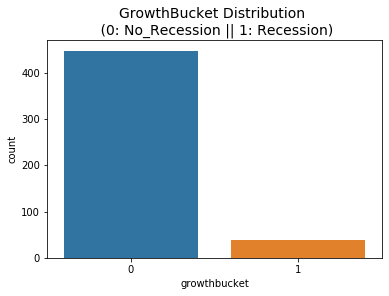

In [933]:
plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot("growthbucket",data=africadf)

#####Medical Dataset

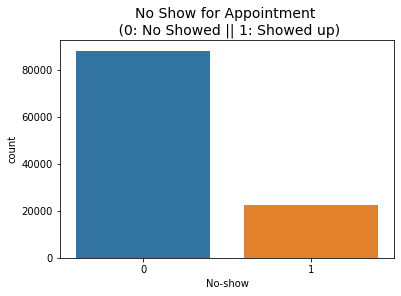

In [934]:
plt.title('No Show for Appointment \n (0: No Showed || 1: Showed up)', fontsize=14)
sns.countplot("No-show",data=medicaldf)

#####Contraceptive Dataset

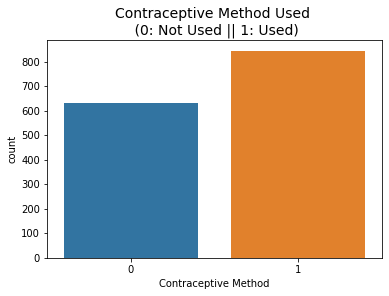

In [935]:
plt.title('Contraceptive Method Used \n (0: Not Used || 1: Used)', fontsize=14)
sns.countplot("Contraceptive Method",data=conceptdf)

###Pie Chart Representing Percentage of Imbalance


####Africa Dataset


In [936]:
recession= len(africadf[africadf['growthbucket']==1])
no_recession=len(africadf[africadf['growthbucket']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)


Percentage of Recession is 7.818930041152264
Percentage of No Recession is 92.18106995884774


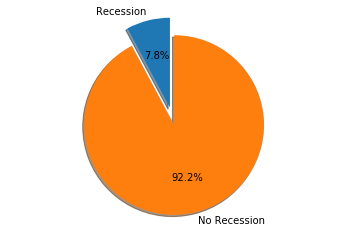

In [937]:

labels = 'Recession','No Recession'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

####Medical Dataset

In [938]:
show= len(medicaldf[medicaldf['No-show']==0])
noshow=len(medicaldf[medicaldf['No-show']==1])

percentofnoshow= noshow/(show+noshow)
percentofshow=show/(show+noshow)

print("Percentage of No Show is", percentofnoshow*100)
print("Percentage of Show is", percentofshow*100)

Percentage of No Show is 20.19269988307486
Percentage of Show is 79.80730011692513


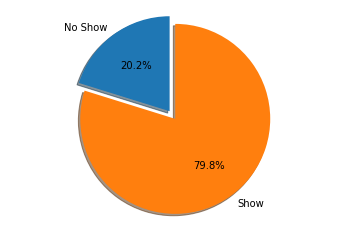

In [939]:
labels = 'No Show','Show'

sizes=[percentofnoshow,percentofshow]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

####Contraceptive Dataset

In [940]:
noused= len(conceptdf[conceptdf['Contraceptive Method']==0])
used=len(conceptdf[conceptdf['Contraceptive Method']==1])

percentofnoused= noused/(used+noused)
percentofused=used/(used+noused)

print("Percentage of No Use is", percentofnoused*100)
print("Percentage of used is", percentofused*100)

Percentage of No Use is 42.701968771215206
Percentage of used is 57.298031228784794


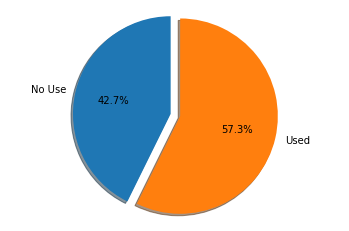

In [941]:
labels = 'No Use','Used'

sizes=[percentofnoused,percentofused]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

In [942]:
conceptdf.describe()

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method,ID
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,0.572980,736.000000
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.494813,425.362786
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,368.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000,736.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,1.000000,1104.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1472.000000


##Inspection of Dataset

###Africa Dataset

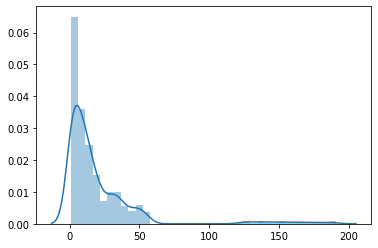

In [943]:
##Distribution of the population of the countries
population=africadf['pop'].values
sns.distplot(population)

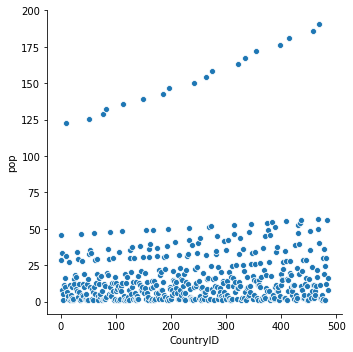

In [944]:
## the population of each country in scatter graph form
sns.relplot(x="CountryID", y="pop",data=africadf);


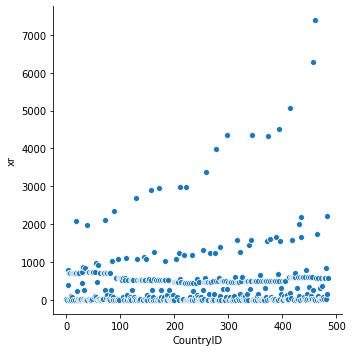

In [945]:
# countries currency exchange 
sns.relplot(x="CountryID", y="xr",data=africadf);


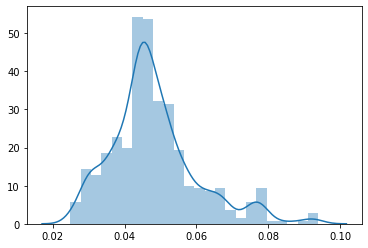

In [946]:
depreciationofcaptialstock=africadf['delta'].values
sns.distplot(depreciationofcaptialstock)

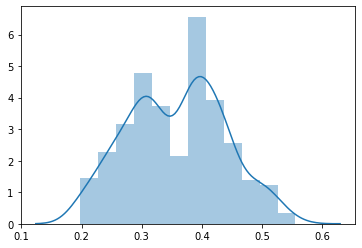

In [947]:
##distribution of the countries employment rate
employed=africadf['emp_to_pop_ratio'].values
sns.distplot(employed)

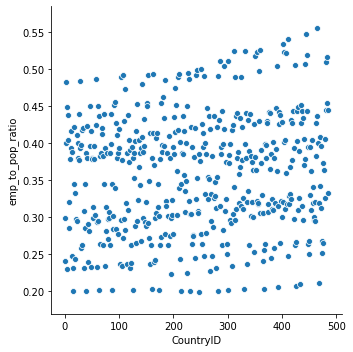

In [948]:
sns.relplot(x="CountryID", y="emp_to_pop_ratio",data=africadf); ##scatter graph of the employement ratio rate

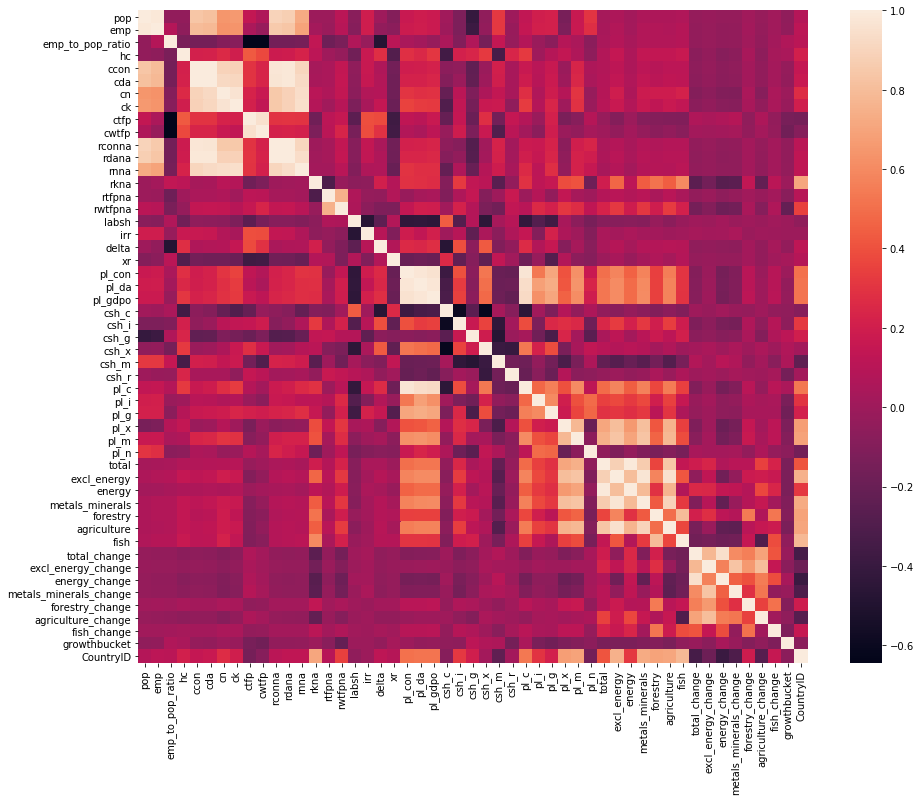

In [949]:
#Heatmap shows the correlation between each feature 
plt.figure(figsize=(15,12))
sns.heatmap(data=africadf.corr())

###Medical Dataset

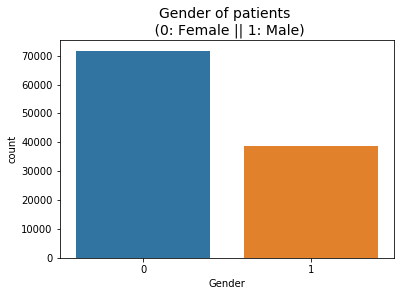

In [950]:
plt.title('Gender of patients \n (0: Female || 1: Male)', fontsize=14)
sns.countplot("Gender",data=medicaldf)

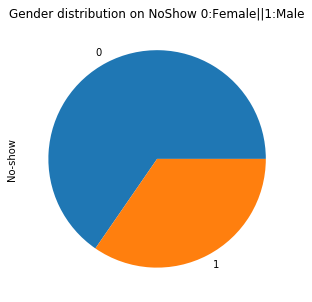

In [951]:
#Gender No Show relationship
gendernoshow=medicaldf.groupby('Gender').sum()['No-show']

gendernoshow.plot.pie(figsize=(5,5),title='Gender distribution on NoShow 0:Female||1:Male')

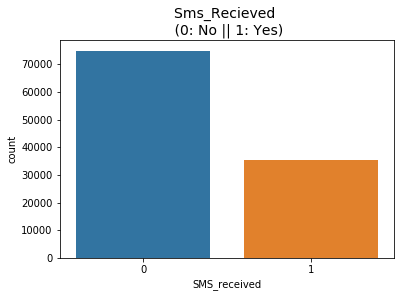

In [952]:
plt.title('Sms_Recieved \n (0: No || 1: Yes)', fontsize=14)
sns.countplot("SMS_received",data=medicaldf)

SMS_received
0    12503
1     9775
Name: No-show, dtype: int64


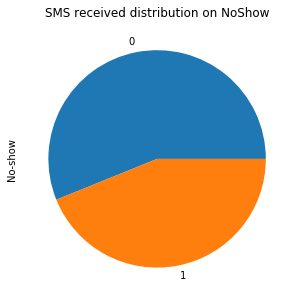

In [953]:
#SMS No Show ratio
smsnoshow=medicaldf.groupby('SMS_received').sum()['No-show']
print(smsnoshow)
smsnoshow.plot.pie(figsize=(5,5),title='SMS received distribution on NoShow')

Age
0      639
1      415
2      252
3      277
4      282
      ... 
98       1
99       0
100      0
102      0
115      3
Name: No-show, Length: 103, dtype: int64


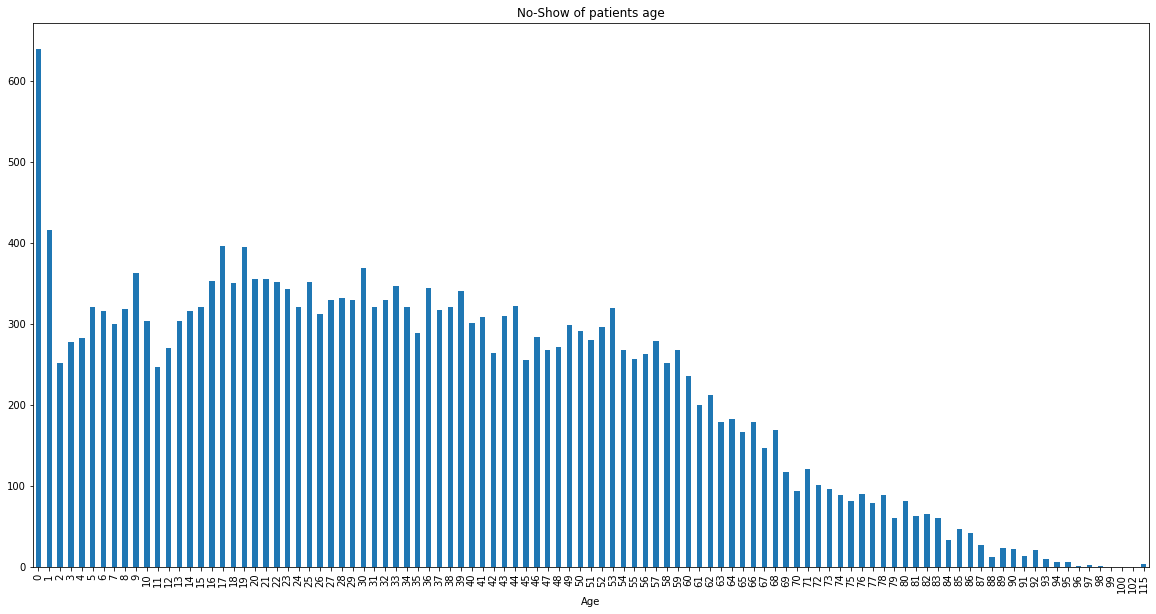

In [954]:
agenoshow=medicaldf.groupby('Age').sum()['No-show']

print(agenoshow)

agenoshow.plot(kind='bar',figsize=(20,10),title='No-Show of patients age')

Neighbourhood
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         921
RESISTÊNCIA                     903
CENTRO                          701
                               ... 
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
PARQUE INDUSTRIAL                 0
Name: No-show, Length: 81, dtype: int64


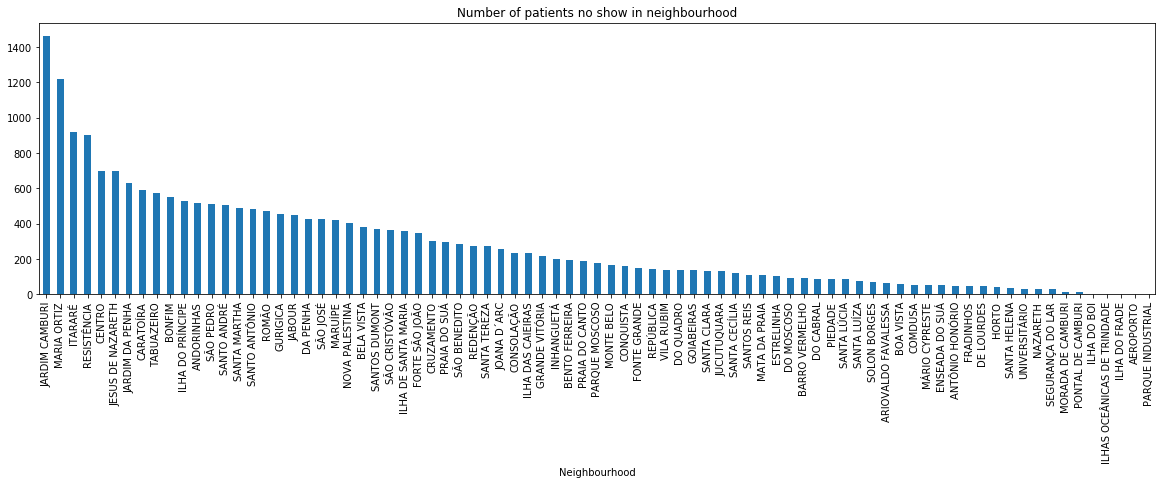

In [955]:
neighbournoshow=medicaldf.groupby('Neighbourhood').sum()['No-show'].sort_values(ascending=False) 
# number of no show patients in each hospital
print(neighbournoshow)
neighbournoshow.plot(kind='bar',figsize=(20,5),title='Number of patients no show in neighbourhood')

In [956]:
conditions=medicaldf.groupby('No-show')['Hipertension','Diabetes', 'Alcoholism','Handcap'].sum()
print(conditions)

         Hipertension  Diabetes  Alcoholism  Handcap
No-show                                             
0               17968      6478        2677     1676
1                3748      1422         675      366


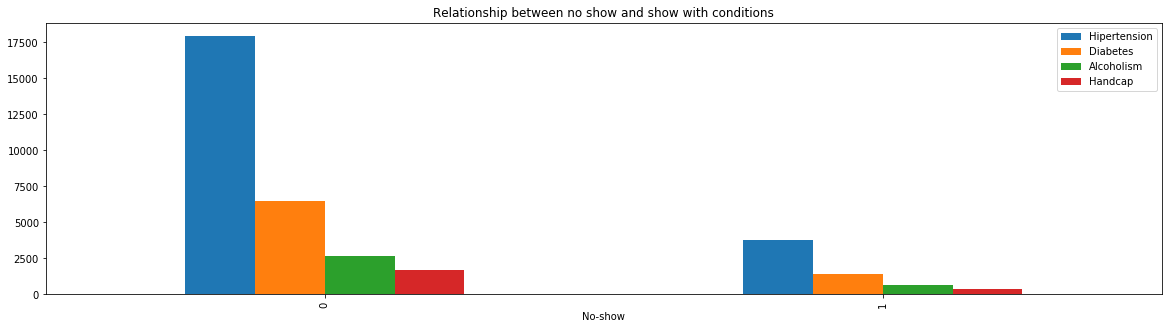

In [957]:
conditions.plot(kind='bar',figsize=(20,5),title='Relationship between no show and show with conditions')

###Contraceptive Dataset

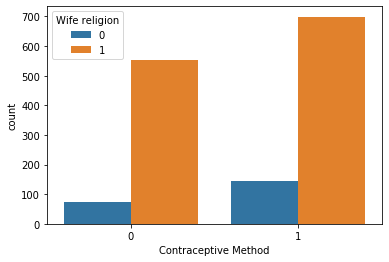

In [970]:
sns.countplot(x='Contraceptive Method',data=conceptdf,hue="Wife religion")

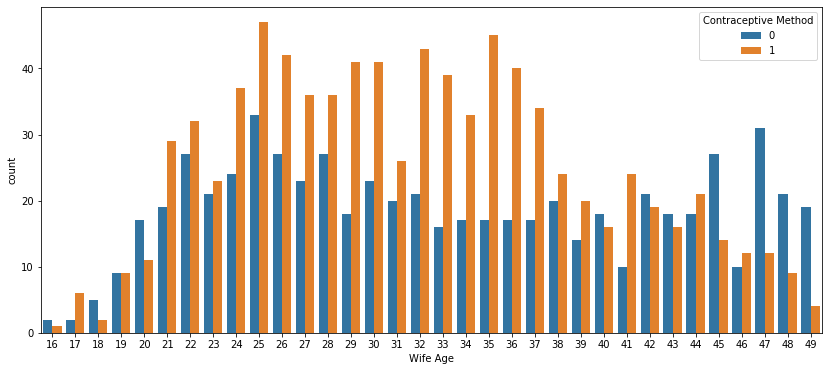

In [974]:
plt.figure(figsize=(14,6))
sns.countplot(x='Wife Age',data=conceptdf,hue="Contraceptive Method")

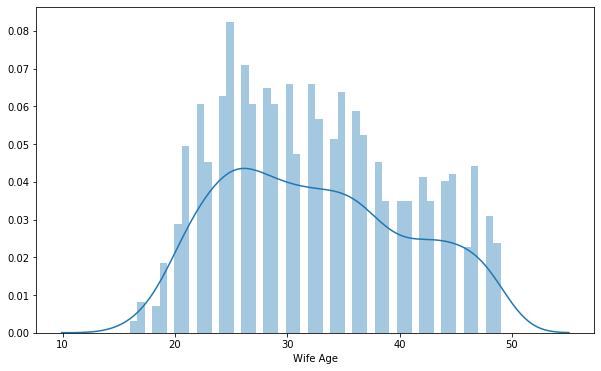

In [960]:
plt.figure(figsize=(10,6)) #distribution of the wifes ages
sns.distplot(conceptdf['Wife Age'],bins=50)

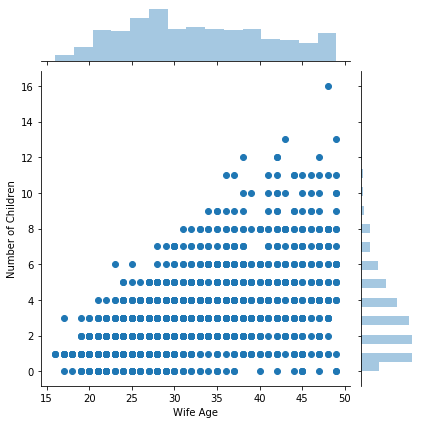

In [962]:
sns.jointplot(x='Wife Age',y='Number of Children',data=conceptdf)

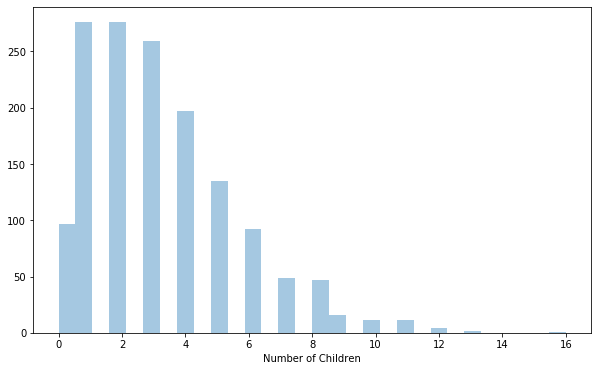

In [963]:
plt.figure(figsize=(10,6))
sns.distplot(conceptdf['Number of Children'],bins=30,kde=False)

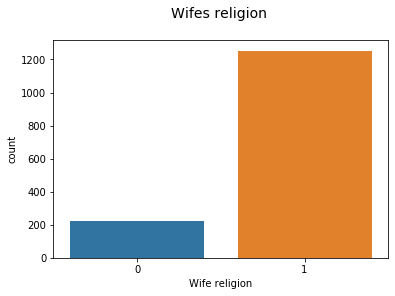

In [971]:
plt.title('Wifes religion \n', fontsize=14)
sns.countplot("Wife religion",data=conceptdf)

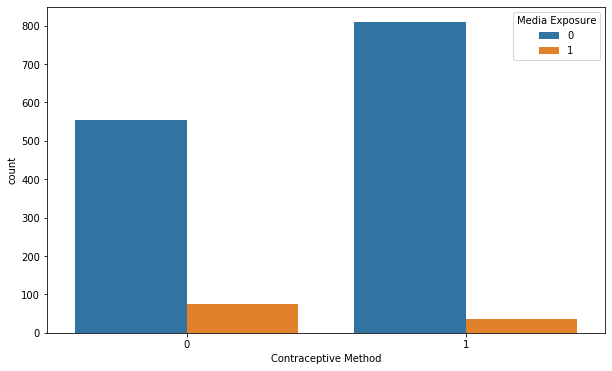

In [976]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contraceptive Method',data=conceptdf,hue="Media Exposure")

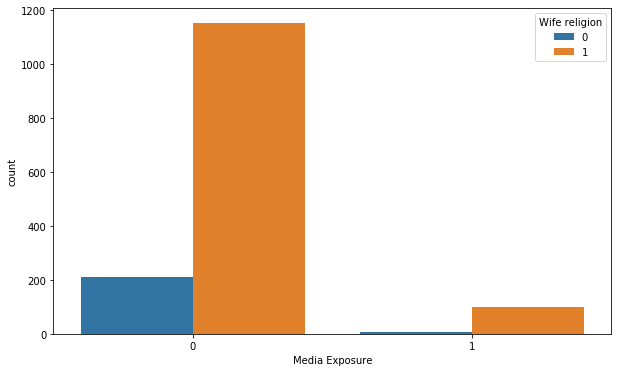

In [982]:
plt.figure(figsize=(10,6))
sns.countplot(x='Media Exposure',data=conceptdf,hue="Wife religion")